[[0.9025 0.0475 0.0475 0.0025 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.0475 0.9025 0.0025 0.0475 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.0475 0.0025 0.9025 0.0475 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.0025 0.0475 0.0475 0.9025 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.9025 0.0475 0.0475 0.0025 0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.0475 0.9025 0.0025 0.0475 0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.0475 0.0025 0.9025 0.0475 0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.0025 0.0475 0.0475 0.9025 0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.9025 0.0475
  0.0475 0.0025 0.     0

0.25

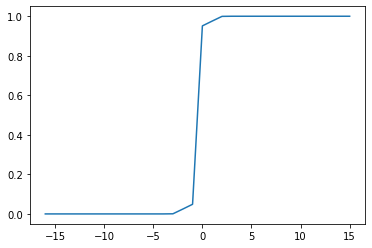

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix for one RRAM cell (test)
CM = [[0.99, 0.01, 0, 0], [0.01, 0.98, 0.01, 0], [0, 0.01, 0.98, 0.01], [0, 0, 0.01, 0.99]]
CM = [[0.95, 0.05, 0, 0], [0.05, 0.95, 0, 0], [0, 0, 0.95, 0.05], [0, 0, 0.05, 0.95]]
CM = np.array(CM)

# Kronecker confusion matrix for two RRAM cells (test)
KCM = np.kron(CM, CM)
order = [0, 1, 4, 5, 2, 3, 6, 7, 8, 9, 12, 13, 10, 11, 14, 15]
KCM = KCM[np.ix_(order, order)]
print(KCM)

# Weight probability matrix
WPM = 1/16 * np.ones(16)
WPM

# Error distribution matrix
EDM = np.zeros((16, 32))
for i in range(16):
    for j in range(16):
        EDM[i][i-j+16] += KCM[i][j]

# Error distribution vector with weight probabilities accounted for
EDV = np.dot(EDM.T, WPM)

# CDF of error distribution
CDF = np.cumsum(EDV)
plt.plot(np.arange(-16, 16), CDF)

variance = np.dot(EDV, np.arange(-16, 16)**2)
variance